<a href="https://colab.research.google.com/github/bhadreshpsavani/ExploringDataScience/blob/master/Ecommerece_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Exploratory Data Analysis (EDA):
An approach to analyse and find characteristics and interesting patterns in the data

1. Make Data in Representable
2. Spot Anomaly
3. Find Pattern
4. Test Hypothesis

Data Scientist roughly spend around 40-50% of their time in EDA

## 1. Import

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st #a scientific library for Python

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/Ecommerce/processed_ecommerce_data.csv', index_col=0)

## Step1. Analyse Features

In [7]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   392732 non-null  int64  
 1   stock_code    392732 non-null  object 
 2   description   392732 non-null  object 
 3   quantity      392732 non-null  int64  
 4   invoice_date  392732 non-null  object 
 5   unit_price    392732 non-null  float64
 6   cust_id       392732 non-null  float64
 7   country       392732 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 27.0+ MB


In [9]:
df.describe()

,invoice_num,quantity,unit_price,cust_id
count,392732.000000,392732.000000,392732.000000,392732.000000
mean,560591.072436,13.153718,3.125596,15287.734822
std,13087.116747,181.588420,22.240725,1713.567773
min,536365.000000,1.000000,0.000000,12346.000000
25%,549234.000000,2.000000,1.250000,13955.000000
50%,561874.000000,6.000000,1.950000,15150.000000
75%,572061.000000,12.000000,3.750000,16791.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


In [10]:
df['stock_code'].value_counts()

85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
          ... 
90055        1
84795C       1
35597A       1
44242A       1
37379A       1
Name: stock_code, Length: 3665, dtype: int64

In [11]:
df['description'].value_counts()

white hanging heart t-light holder    2016
regency cakestand 3 tier              1714
jumbo bag red retrospot               1615
assorted colour bird ornament         1395
party bunting                         1390
                                      ... 
marie antoienett trinket box gold        1
black cherry lights                      1
2 daisies hair comb                      1
set/5 red spotty lid glass bowls         1
pink/white glass demi choker             1
Name: description, Length: 3877, dtype: int64

In [12]:
df['description'] = df['description'].str.lower()
df['description'].value_counts()

white hanging heart t-light holder    2016
regency cakestand 3 tier              1714
jumbo bag red retrospot               1615
assorted colour bird ornament         1395
party bunting                         1390
                                      ... 
marie antoienett trinket box gold        1
black cherry lights                      1
2 daisies hair comb                      1
set/5 red spotty lid glass bowls         1
pink/white glass demi choker             1
Name: description, Length: 3877, dtype: int64

In [13]:
print(len(df['country'].value_counts()))
df['country'].value_counts()

37


United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

## Step2. Data Preprocessing:

### i. Handle Incorrect Datatype:

In [14]:
df.cust_id = df.cust_id.astype('int64')

In [15]:
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%m/%d/%Y %H:%M')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   392732 non-null  int64         
 1   stock_code    392732 non-null  object        
 2   description   392732 non-null  object        
 3   quantity      392732 non-null  int64         
 4   invoice_date  392732 non-null  datetime64[ns]
 5   unit_price    392732 non-null  float64       
 6   cust_id       392732 non-null  int64         
 7   country       392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.0+ MB


### ii. Add Columns related to Date

In [43]:
df['invoice_day'] = df['invoice_date'].dt.day
df['invoice_day_of_week'] = df['invoice_date'].dt.dayofweek
df['invoice_month'] = df['invoice_date'].dt.month
df['invoice_hour'] = df['invoice_date'].dt.hour
df['invoice_year'] = df['invoice_date'].dt.year
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,invoice_day,invoice_day_of_week,invoice_month,invoice_hour,total_amount,invoice_year
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1,2,12,8,15.30,2010
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,2,12,8,20.34,2010
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,1,2,12,8,22.00,2010
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,2,12,8,20.34,2010
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,2,12,8,20.34,2010


In [44]:
days_of_week = {0:"Monday", 1:"Tuesday", 2:"Wendesday", 3:"Thursday", 4:"Friday" , 5:"Saturday", 6:"Sunday"}

In [45]:
df['invoice_day_of_week'] = df['invoice_day_of_week'].apply(lambda item: days_of_week[item])
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,invoice_day,invoice_day_of_week,invoice_month,invoice_hour,total_amount,invoice_year
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1,Wendesday,12,8,15.30,2010
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,Wendesday,12,8,20.34,2010
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,1,Wendesday,12,8,22.00,2010
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,Wendesday,12,8,20.34,2010
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,Wendesday,12,8,20.34,2010


### iii. Calculate Total Amount:

In [46]:
df['total_amount'] = df['quantity'] * df['unit_price']

In [47]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,invoice_day,invoice_day_of_week,invoice_month,invoice_hour,total_amount,invoice_year
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1,Wendesday,12,8,15.30,2010
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,Wendesday,12,8,20.34,2010
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,1,Wendesday,12,8,22.00,2010
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,Wendesday,12,8,20.34,2010
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,1,Wendesday,12,8,20.34,2010


## Step3. Data Analysis:

Commanly used graphs in EDA:
* Histogram
* Bar chart
* Scatter Plot
* Normal Plot
* Boxplot

### 1. Identify Outliers:
Histogram is a graph which shows us how many time perticular values appear in the dataset. It is similar to `value_counts()`.

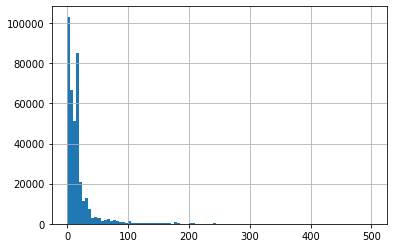

In [48]:
df['total_amount'].hist(bins=100, range=(0,500))

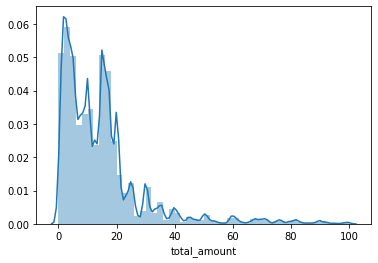

In [49]:
sns.distplot(df.query('total_amount<100')['total_amount'])

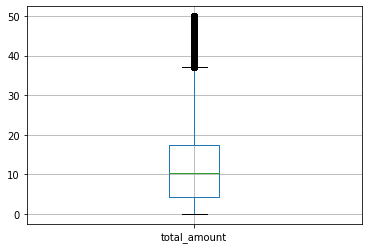

In [50]:
df.query('total_amount<50').boxplot(column='total_amount')

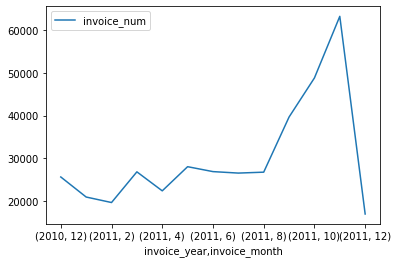

In [55]:
df.pivot_table(index=['invoice_year', 'invoice_month'], values='invoice_num', aggfunc='count').plot()

### Price Analysis:

#### What is Month wise total profit per order?

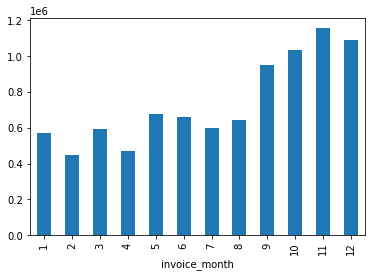

In [25]:
df.groupby('invoice_month')['total_amount'].sum().plot.bar()

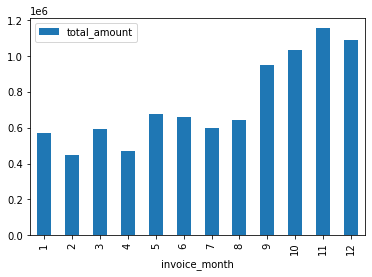

In [26]:
df.pivot_table(index='invoice_month', values='total_amount', aggfunc='sum').plot.bar()

### Order Analysis

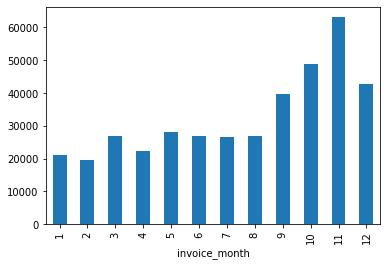

In [27]:
df.groupby('invoice_month')['invoice_num'].count().plot.bar()
# df.pivot_table(index='invoice_month', values='invoice_num', aggfunc='count').plot.bar()

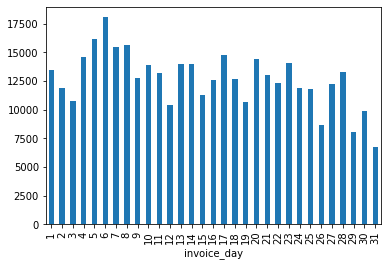

In [28]:
df.groupby('invoice_day')['invoice_num'].count().plot.bar()
# df.pivot_table(index='invoice_day', values='invoice_num', aggfunc='count').plot.bar()

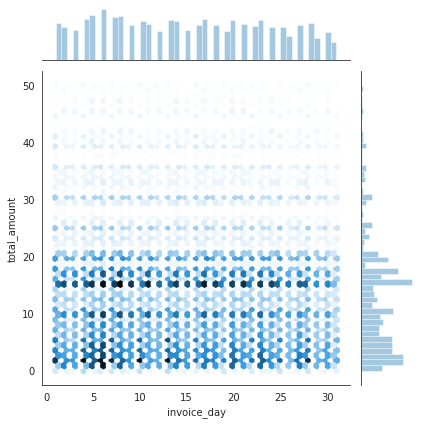

In [35]:
tmp_df=df.query("total_amount<50")
# Scatter Plot:
with sns.axes_style('white'):
    sns.jointplot("invoice_day", "total_amount", data=tmp_df, kind='hex')

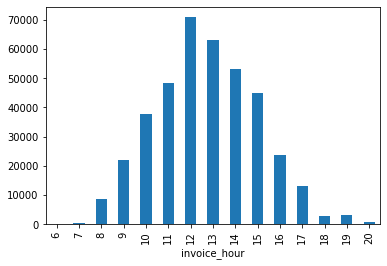

In [30]:
df.groupby('invoice_hour')['invoice_num'].count().plot.bar()
# df.pivot_table(index='invoice_hour', values='invoice_num', aggfunc='count').plot.bar()

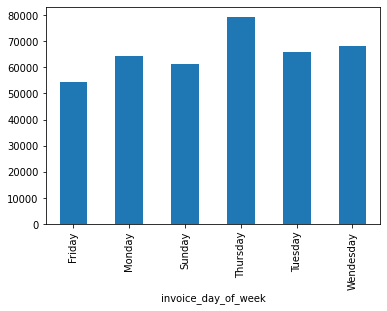

In [31]:
df.groupby('invoice_day_of_week')['invoice_num'].count().plot.bar()
# df.pivot_table(index='invoice_day_of_week', values='invoice_num', aggfunc='count').plot.bar()

#### 4. Month wise Free orders?

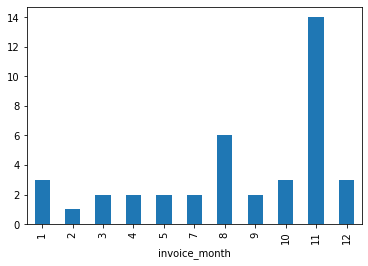

In [32]:
df.query('total_amount==0').groupby('invoice_month')['invoice_num'].count().plot.bar()
# df.query('total_amount==0').pivot_table(index='invoice_month', values='invoice_num', aggfunc='count').plot.bar()

## Step4.Test the hypotheses using T-test:

The **null hypothesis** and **the alternative hypothesis** are formal methods of reaching conclusions or making decisions on the basis of incomplete information.

*Usually, the null hypothesis is a statement of **'no effect'** or **'no difference'**.*

Most common T - test method available from scipy:

* **st.ttest_1samp**: compare population mean with given value 
* **st.ttest_ind**: compare two population(distribution) mean by taking independent sample 
* **st.ttest_rel**: compare two population(distribution) mean by taking relative/paired sample


### Test1. The average profit from users of France and Germany different.
Null Hypothesis: **There is no difference between the avearge profit from France and Germany**

In [ ]:
profit_germany = df.query('country=="Germany"')['total_amount']
profit_france = df.query('country=="France"')['total_amount']
alpha = .05 # critical statistical significance level

In [ ]:
"""
This is a two-sided test for the null hypothesis that 2 independent samples have 
identical average (expected) values. This test assumes that the populations have 
identical variances by default.
"""
results = st.ttest_ind(
        profit_germany, 
        profit_france
)

In [ ]:
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.7824016435151694
We can't reject the null hypothesis


### Test2. The average profit from users of USA and Netherlands different.
Null Hypothesis: **There is no difference between the avearage profit of USA and Netherland**

In [ ]:
profit_usa = df.query('country=="USA" and total_amount>0')['total_amount']
profit_netherlands = df.query('country=="Netherlands" and total_amount>0')['total_amount']
alpha = .05 # critical statistical significance level

In [ ]:
results = st.ttest_ind(
        profit_usa, 
        profit_netherlands
)

In [ ]:
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  2.882256909468613e-16
We reject the null hypothesis


Blogs:
* [Pivot Table](https://towardsdatascience.com/a-step-by-step-guide-to-pandas-pivot-tables-e0641d0c6c70)
* [Hypothesis Testing](https://towardsdatascience.com/everything-you-need-to-know-about-hypothesis-testing-part-i-4de9abebbc8a#:~:text=is%20not%20interesting.-,It%20is%20the%20interpretation%20of%20the%20data%20that%20we%20are,supported%20by%20the%20sample%20data.)

Connect:
* [Github](https://github.com/bhadreshpsavani)
* [Linkdin](https://www.linkedin.com/in/bhadreshsavani/)

# Thanks you!